In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-website-users/users.csv


(1097, 4)


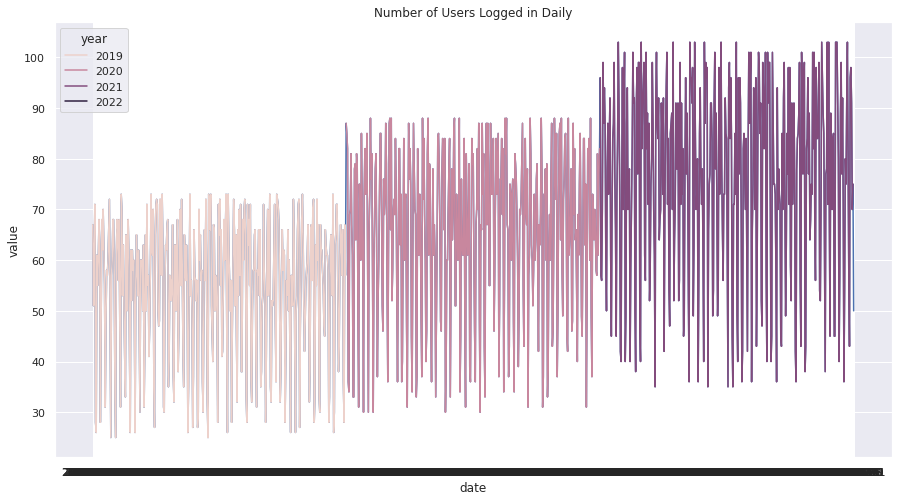

In [2]:
import seaborn as sns
import statsmodels as sm

Dailywebdf =  pd.read_csv('/kaggle/input/daily-website-users/users.csv')
print(Dailywebdf.shape)
Dailywebdf.head()
sns.set(rc={"figure.figsize":(15,8)})
plt1=sns.lineplot(data=Dailywebdf,x='date',y='value').set(title="Number of Users Logged in Daily(2019-2022)")
plt1
Dailywebdf['date1']=pd.to_datetime(Dailywebdf['date'],errors='coerce')
Dailywebdf['year']=Dailywebdf['date1'].dt.year
Dailywebdf['month']=Dailywebdf['date1'].dt.month
Dailywebdf['day']=Dailywebdf['date1'].dt.day
plt2=sns.lineplot(data=Dailywebdf,x='date',y='value',hue='year').set(title="Number of Users Logged in Daily")

Yearly increase in number of users that are logging in

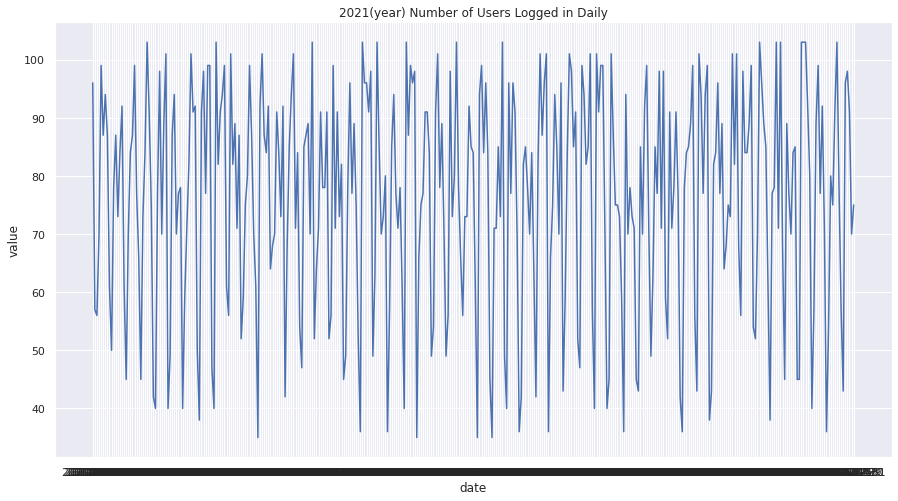

In [3]:
Dailywebdf1=Dailywebdf[(Dailywebdf['year']==2021)].reset_index().drop(columns=['Unnamed: 0','index'])
Dailywebdf2=Dailywebdf[(Dailywebdf['year']==2019)].reset_index().drop(columns=['Unnamed: 0','index'])
Dailywebdf3=Dailywebdf[(Dailywebdf['year']==2020)].reset_index().drop(columns=['Unnamed: 0','index'])
plt2=sns.lineplot(data=Dailywebdf1,x='date',y='value').set(title="2021(year) Number of Users Logged in Daily")

0.13.2


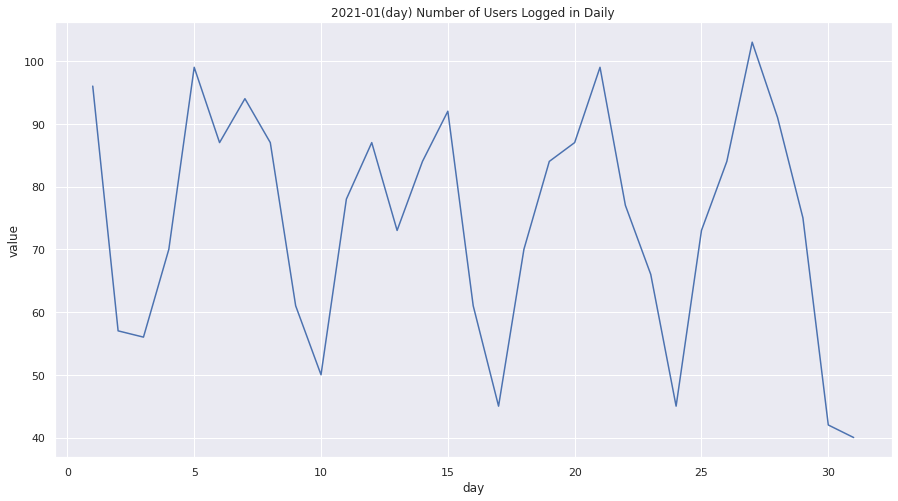

In [4]:
descript_21=Dailywebdf1['value'].describe()
descript_19=Dailywebdf2['value'].describe()
descript_20=Dailywebdf3['value'].describe()
Dailywebdf1_month=Dailywebdf[(Dailywebdf['year']==2021)&(Dailywebdf['month']==1)].reset_index().drop(columns=['Unnamed: 0','index'])
Mean = pd.DataFrame({'Year':[2019,2020,2021],'Mean':[descript_19['mean'],descript_20['mean'],descript_21['mean']]})
plt3=sns.lineplot(data=Dailywebdf1_month,x='day',y='value').set(title="2021-01(day) Number of Users Logged in Daily")
Mean
print(sm.__version__)

Yearly Graph for 2021 shows that there graph trends are in sinusodial wave kind graph.on plotting line graph for one month data ,data is distributed in sinusodial form.

<AxesSubplot:>

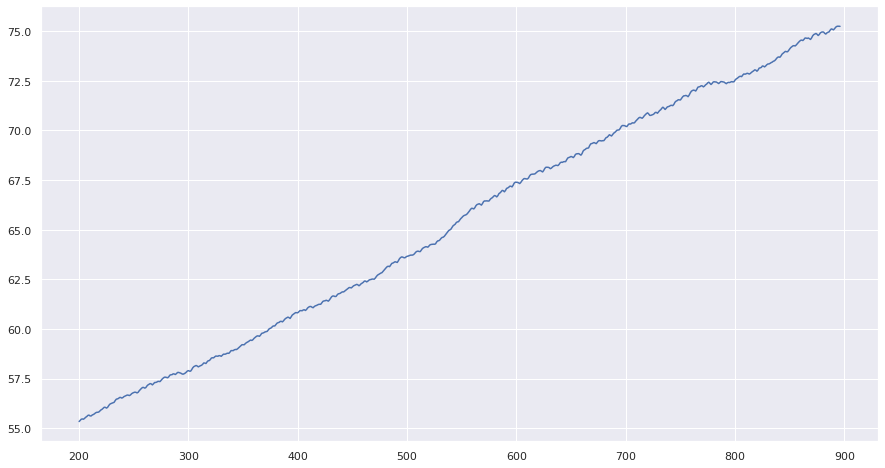

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

mul_dec = seasonal_decompose(Dailywebdf['value'],model='multiplicative',period=400)
add_dec = seasonal_decompose(Dailywebdf['value'],model='additive',period=400)
result_adf=adfuller(Dailywebdf['value'])
mul_dec.trend.plot()

<AxesSubplot:>

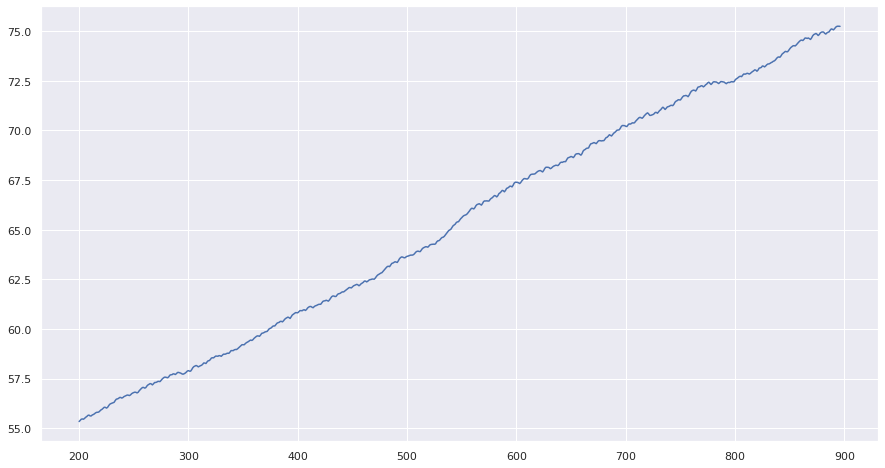

In [6]:
add_dec.trend.plot()

The Yearly Trend for multiplicative and additive decompose graph is in increasing order.

In [7]:
print("p-value=",result_adf[1])

p-value= 0.5584324818994373


The pvalue for augmentated dickey fuller test is not less than .05 hence we cannot reject the null and the values are non stationery and 1st differencing will be required.

In [8]:
Dailywebdf['diff1']=Dailywebdf['value'].diff()
Dailywebdf['diff1']=Dailywebdf['diff1'].fillna(0)

In [9]:
result_adf1=adfuller(Dailywebdf['diff1'])
print('p-value=',result_adf1[1])

p-value= 5.674175568009798e-26


The pvalue for augmentated dickey fuller test is less than .05 through 1st differencing hence we reject the null and the values are stationery.

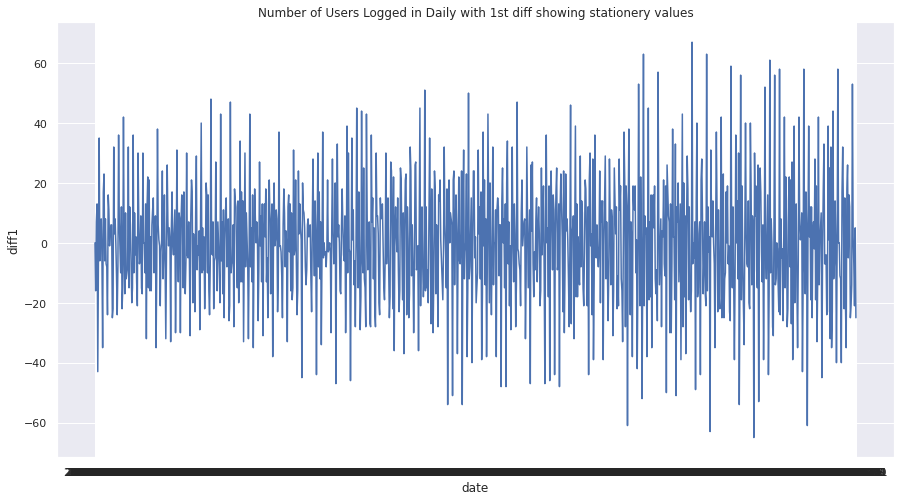

In [10]:
plt4=sns.lineplot(data=Dailywebdf,x='date',y='diff1').set(title="Number of Users Logged in Daily with 1st diff showing stationery values")

In [11]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

acf_values=acf(Dailywebdf['diff1'])
np.round(acf_values,2)#7 lags highest

array([ 1.  , -0.19, -0.3 , -0.01, -0.01, -0.3 , -0.  ,  0.64, -0.01,
       -0.32,  0.01, -0.02, -0.28, -0.03,  0.63,  0.  , -0.3 , -0.02,
        0.01, -0.32,  0.  ,  0.63, -0.01, -0.31,  0.  , -0.01, -0.3 ,
        0.01,  0.6 , -0.  , -0.31])

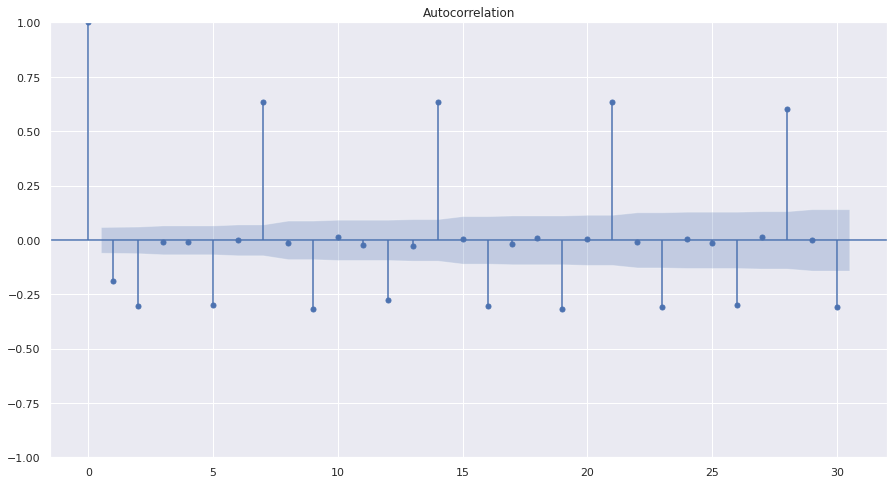

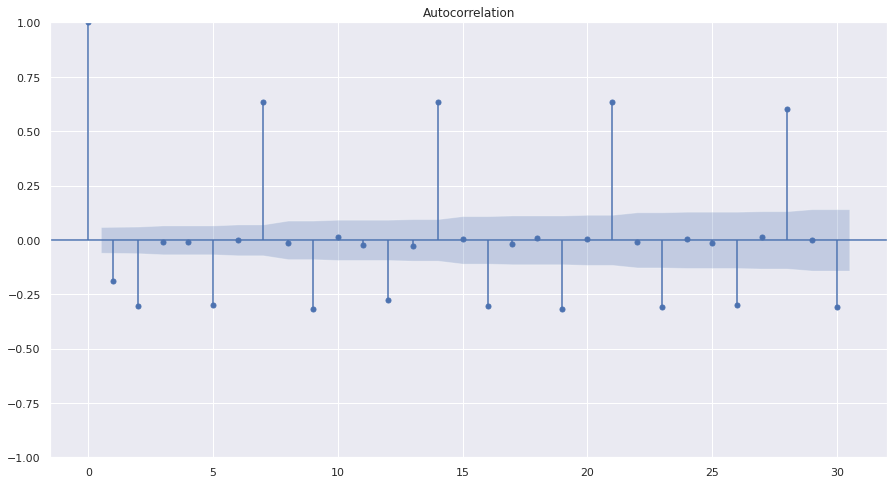

In [12]:
plot_acf(Dailywebdf['diff1'],lags=30)

AutoCoorelation function appearing as 7th lag highest.

In [13]:
pacf_values=pacf(Dailywebdf['diff1'])
np.round(pacf_values,2)

array([ 1.  , -0.19, -0.35, -0.18, -0.21, -0.54, -0.68, -0.1 ,  0.05,
       -0.05,  0.01,  0.04, -0.04, -0.39, -0.09,  0.  ,  0.02, -0.01,
        0.09, -0.06, -0.27, -0.  ,  0.03,  0.01,  0.04,  0.05, -0.02,
       -0.13,  0.  ,  0.03,  0.  ])

6 Lags negative coorelated,13 lag negative correlated

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


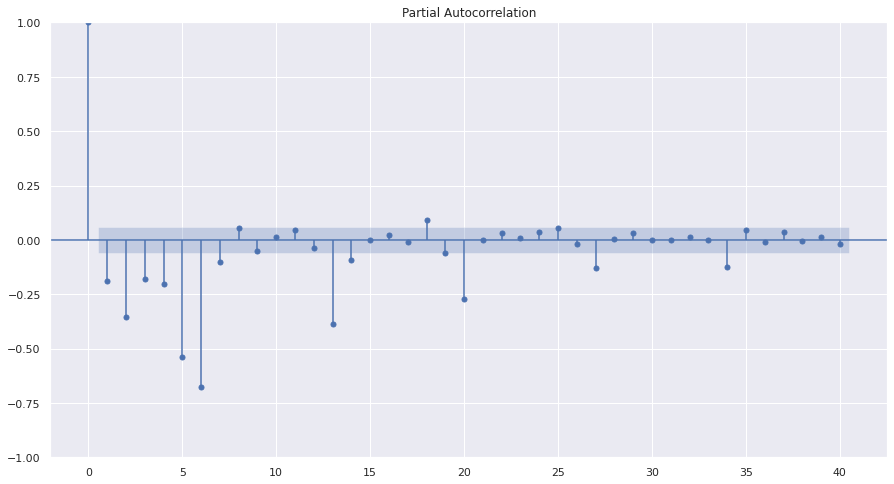

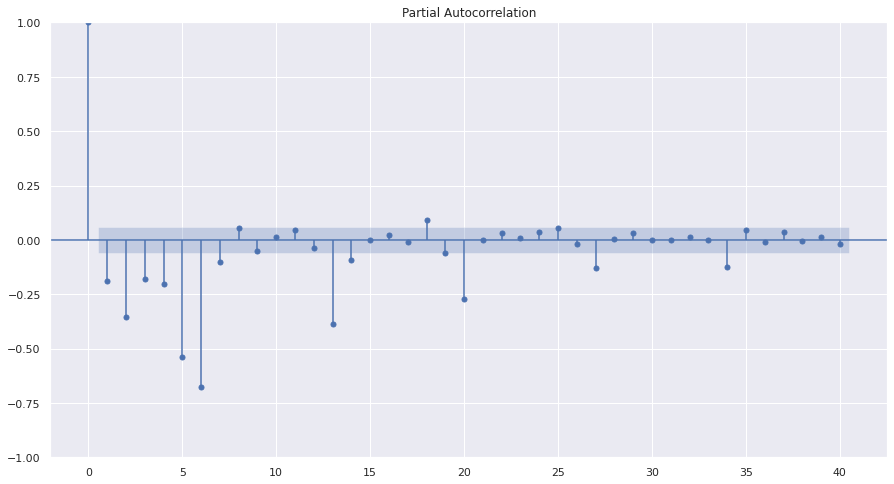

In [14]:
plot_pacf(Dailywebdf['diff1'],lags=40)

Partial Auto Corelation functions appearing in Negative postion for 6th lag and 13th lag.

ACF and PACF is found to be in 7th lag and negative 6th lags , acf for 7th lag is repetative so there can be occurrence of seasonality hence taking q value as 1.

In [15]:
df_splt=np.round(0.80*(len(Dailywebdf))).astype(int)
#training data 80% and test dataset 20%
Train_df=Dailywebdf[:df_splt]
Test_df=Dailywebdf[df_splt:]
print('Training Data total obs',Train_df.shape[0])
print('Testing Data total obs',Test_df.shape[0])

Training Data total obs 878
Testing Data total obs 219


In [16]:
from statsmodels.tsa.arima.model import ARIMA
#ACF = q ,PACF=P
q=1
d=1
p=4
model_test=ARIMA(Train_df.value,order=(p,d,q))
model_fit = model_test.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  878
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -3545.798
Date:                Fri, 12 May 2023   AIC                           7103.597
Time:                        19:25:20   BIC                           7132.256
Sample:                             0   HQIC                          7114.558
                                - 878                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1615      0.033      4.880      0.000       0.097       0.226
ar.L2         -0.4045      0.037    -10.918      0.000      -0.477      -0.332
ar.L3         -0.1023      0.036     -2.813      0.005      -0.174      -0.031
ar.L4         -0.3314      0.034     -9.678      0.000      -0.399      -0.264
ma.L1         -0.9404      0.013    -73.743      0.000      -0.965      -0.915
sigma2       189.4009      9.772     19.383      0.000     170.249     208.553
===================================================================================
Ljung-Box (L1) (Q):                  18.39   Jarque-Bera (JB):                 1.48
Prob(Q):                              0.00   Prob(JB):                         0.48
Heteroskedasticity (H):               1.67   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

LB  p-value is less than 0.05 we reject the null hence white noise is not present and JB test Data stationaritory is acheived by not rejecting the null as p value is more than 0.05. Heteroskedasticity pvalue is 0.00 hence we reject the null and variance is present in the model.

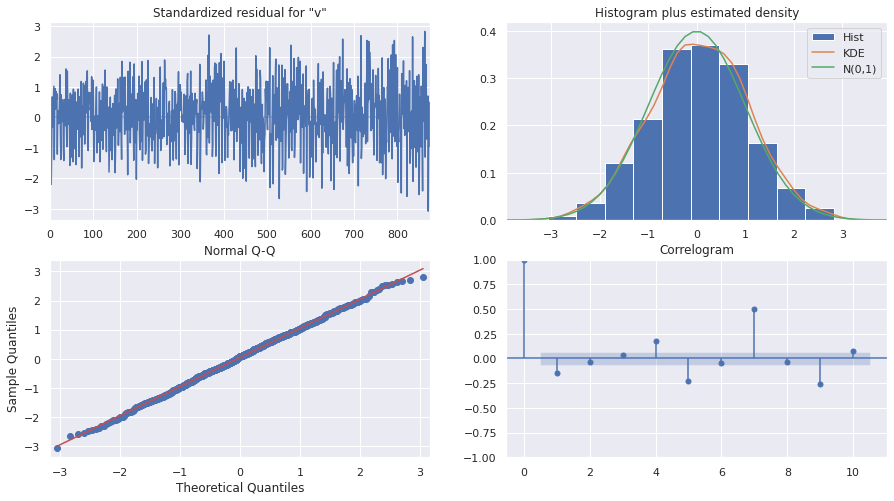

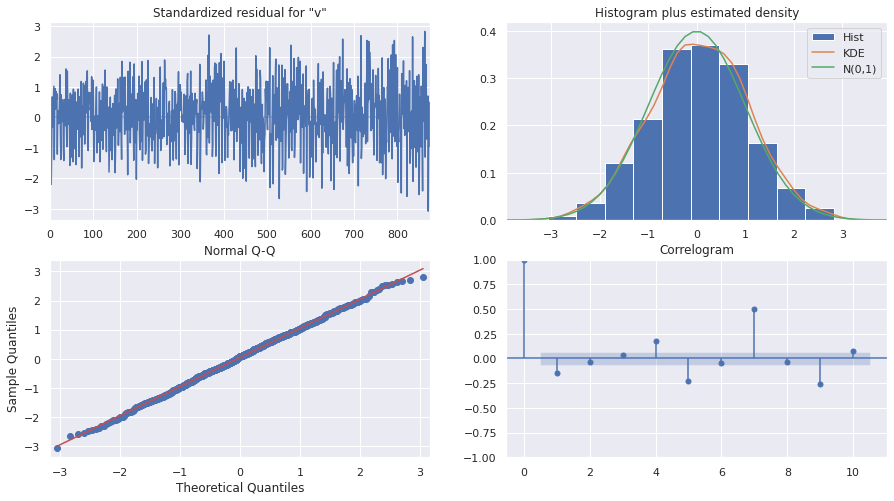

In [17]:
model_fit.plot_diagnostics()